### Use the dataset in assignment 4 (Abalone dataset).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## a) Load the data from data file

In [2]:
columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('abalone.data', names = columns)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## b) Explore the shape of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.shape

(4177, 9)

## c) Summarize the properties in the training dataset. Write findings from column description

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Given is the attribute name, attribute type, the measurement unit and a brief description.                                                                The number of rings is the value to predict: either as a continuous value or as a classification problem.                                                        Name / Data Type / Measurement Unit / Description
------------------------------------------------------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years

 #### Key findings:
- No missing values present in the dataset
- All are numerical features except 'Sex'
- None of the features have minimum = 0 except 'Height'
- Each feature has a different range

In [6]:
df['Rings'].nunique()

28

In [7]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

## d) Check the dataset for any missing values, impute the missing values and also print out the correlation matrix

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## e) Split data into train, test sets

In [10]:
df['Sex'].replace({"M": 0, "I": 1,"F":2 },inplace=True)

In [11]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
from scipy.stats import zscore
data_attr = df.loc[:,'Sex':'Shell weight']
data_attr_z = data_attr.apply(zscore)
array = data_attr_z.values
X = array[:,0:8] # first 8 columns are features
y = df['Rings'] # target variable

In [13]:
print(X.shape)
print(y.shape)

(4177, 8)
(4177,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [15]:
print(X_train.shape)
print(y_train.shape)

(3132, 8)
(3132,)


In [16]:
print(X_test.shape)
print(y_test.shape)

(1045, 8)
(1045,)


## f) Predict ring class as classification problem using Naive Bayes and Decision Tree Classifier

In [17]:
# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=2)
# fit the model
model.fit(X_train,y_train)
# make a probabilistic prediction
NB_test_prob = model.predict(X_test)
NB_train_prob = model.predict(X_train)

In [18]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, min_samples_split=2, random_state=1)
dTree.fit(X_train, y_train)
test_prob = model.predict(X_test)
train_prob = model.predict(X_train)

## g) Calculate the accuracy score of the two models for both training and test data set

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
print('Gaussian Naive Bayes')
print('accuracy_score on train dataset : ', model.score(X_train,y_train))
print('accuracy_score on test dataset : ', model.score(X_test,y_test))

Gaussian Naive Bayes
accuracy_score on train dataset :  0.2656449553001277
accuracy_score on test dataset :  0.2545454545454545


In [21]:
print('Decision Tree Classifier')
print('accuracy_score on train dataset : ',dTree.score(X_train, y_train))
print('accuracy_score on test dataset : ',dTree.score(X_test, y_test))

Decision Tree Classifier
accuracy_score on train dataset :  0.29022988505747127
accuracy_score on test dataset :  0.26220095693779905


## h) Display confusion matrix

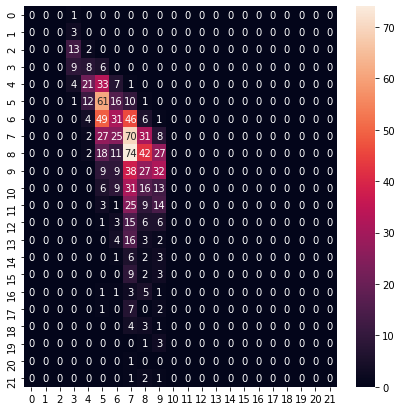

In [22]:
# Gaussian Naive Bayes 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,NB_test_prob)

plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True ,fmt='g')

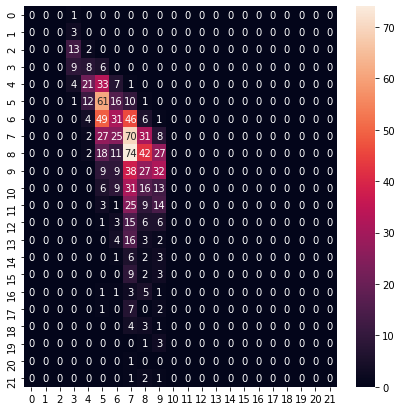

In [23]:
# Decision Tree Classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_prob)

plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True ,fmt='g')

In [24]:
dTree.feature_importances_

array([0.01925107, 0.        , 0.        , 0.        , 0.        ,
       0.13467825, 0.01314455, 0.83292612])

## i) Display the classification report

In [25]:
# Gaussian Naive Bayes 
from sklearn.metrics import classification_report
print(classification_report(y_test, NB_test_prob))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.29      0.39      0.33        23
           6       0.41      0.32      0.36        66
           7       0.28      0.60      0.39       101
           8       0.26      0.23      0.24       137
           9       0.20      0.43      0.27       163
          10       0.27      0.24      0.25       174
          11       0.27      0.28      0.28       115
          12       0.00      0.00      0.00        75
          13       0.00      0.00      0.00        52
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        25
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00        11
          19       0.00    

C:\Users\sahmp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Decision Tree Classifier
from sklearn.metrics import classification_report
print(classification_report(y_test, test_prob))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.29      0.39      0.33        23
           6       0.41      0.32      0.36        66
           7       0.28      0.60      0.39       101
           8       0.26      0.23      0.24       137
           9       0.20      0.43      0.27       163
          10       0.27      0.24      0.25       174
          11       0.27      0.28      0.28       115
          12       0.00      0.00      0.00        75
          13       0.00      0.00      0.00        52
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        25
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00        11
          19       0.00    

## j) Compare the two models based on accuracy score and classification report and give your reasoning on which is the best model in this case.

In [27]:
help(model)

Help on GaussianNB in module sklearn.naive_bayes object:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |  
 |  Gaussian Naive Bayes (GaussianNB)
 |  
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |  
 |      .. versionadded:: 0.20
 |  
 |  Attributes
 |  ----------
 |  

In [28]:
help(dTree)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

### Decision Tree Classifier is a better model in this case since it has a accuracy score that is greater than the one of Gaussian Naive Bayes. 